# https://hsm-edu.tistory.com/606

# k-최근접 이웃 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import numpy as np

In [2]:
altitude = np.array(
    [-0.433155, 1.079574, 2.638519, 4.623501, 7.126587,
    10.685129, 13.399242, 14.621283, 16.544296, 18.743357,
    21.829630, 25.542978, 29.714117, 32.813224, 34.205818,
    34.623686, 34.706989, 33.525600]
     )
temperature = np.array(
    [23.561301, 23.510735, 23.493920, 23.484786, 23.419431,
    23.386666, 23.325946, 23.291131, 23.284900, 23.214066,
    23.192182, 23.189660, 23.156077, 23.085148, 23.081649,
    23.083885, 23.051354, 22.984942]
     )

In [3]:
import matplotlib.pyplot as plt

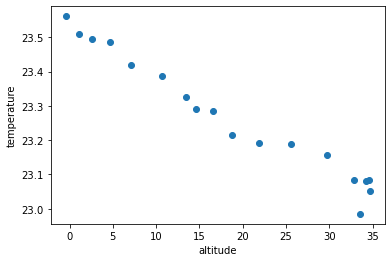

In [4]:
plt.scatter(altitude, temperature)
plt.xlabel('altitude')
plt.ylabel('temperature')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
    altitude, temperature, random_state=13)

In [7]:
print(train_input.shape, test_input.shape)

(13,) (5,)


In [8]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [9]:
print(train_input.shape, test_input.shape)

(13, 1) (5, 1)


## 결정 계수 ($ R^2$)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [12]:
knr.score(test_input, test_target)

0.9332850681247098

In [13]:
from sklearn.metrics import mean_absolute_error

In [14]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

0.03120551999999819


## 과대적합 vs 과소적합

# https://ko.wikipedia.org/wiki/%EA%B3%BC%EC%A0%81%ED%95%A9

In [15]:
print(knr.score(train_input, train_target))

0.9365668896012808


In [16]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 2
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9752818884408169


In [17]:
print(knr.score(test_input, test_target))

0.9468595764262213


In [18]:
knr = KNeighborsRegressor()
# 0에서 35까지 x 좌표를 만듭니다
x = np.arange(0, 35).reshape(-1, 1)

# n = 1, 2, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    # 모델 훈련
    print("n is ", n)
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    print("train R square", knr.score(train_input, train_target))
    print("test R square", knr.score(test_input, test_target))
    diff = knr.score(train_input, train_target)-knr.score(test_input, test_target)
    print("diff is ", diff )
    if (diff < 0) :
        print( "underfitting")
    print("-------------------------------\n")
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 출력

n is  1
train R square 1.0
test R square 0.9011866813018443
diff is  0.09881331869815568
-------------------------------

n is  2
train R square 0.9752818884408169
test R square 0.9468595764262213
diff is  0.028422312014595552
-------------------------------

n is  3
train R square 0.9582501985287637
test R square 0.9600660619413909
diff is  -0.0018158634126271833
underfitting
-------------------------------

n is  4
train R square 0.9450498108825279
test R square 0.9753067663090192
diff is  -0.030256955426491317
underfitting
-------------------------------

n is  5
train R square 0.9365668896012808
test R square 0.9332850681247098
diff is  0.0032818214765709675
-------------------------------

n is  6
train R square 0.9061171888884174
test R square 0.8577110861245476
diff is  0.04840610276386981
-------------------------------

n is  7
train R square 0.8639740098653828
test R square 0.7776287143316193
diff is  0.08634529553376347
-------------------------------

n is  8
train R square

## 확인문제

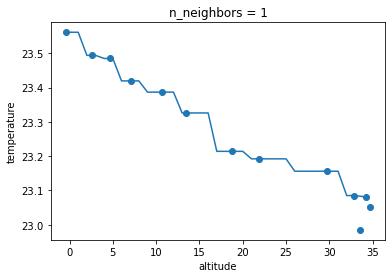

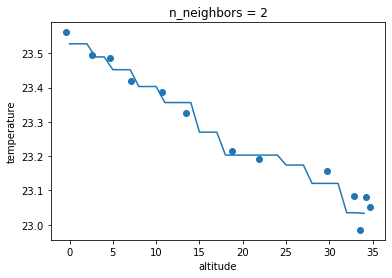

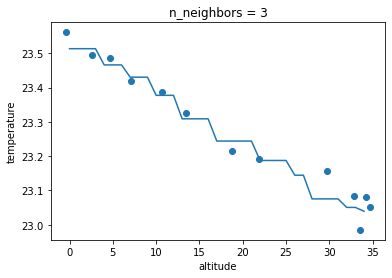

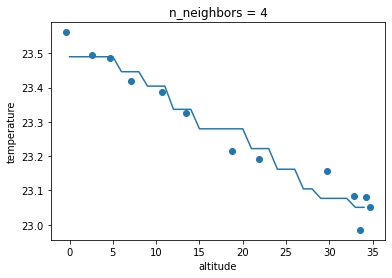

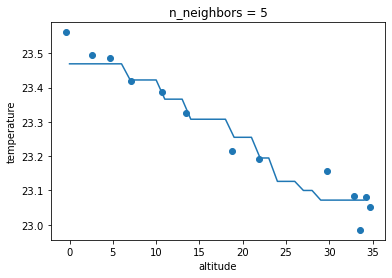

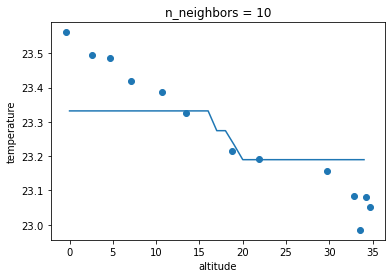

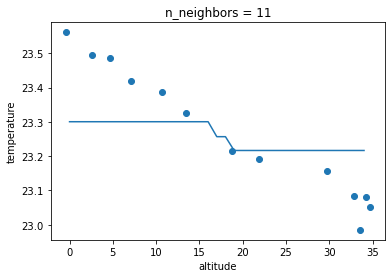

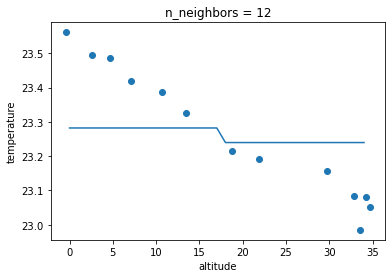

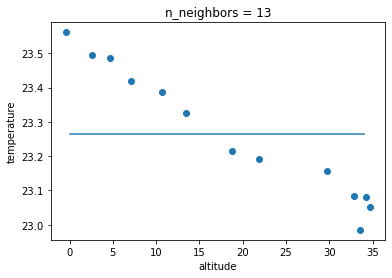

In [19]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 0에서 35까지 x 좌표를 만듭니다
x = np.arange(0, 35).reshape(-1, 1)

# n = 1, 2, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 2, 3, 4, 5, 10, 11, 12, 13]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('altitude')
    plt.ylabel('temperature')
    plt.show()